In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans

## Introduction

Ada sebuah Data Jumlah Kunjungan Wisatawan Mancanegara Berdasarkan pintu masuk Bandara dan Pelabuhan di Tahun 2014 yang akan dilakukan clustering untuk masing-masing pintu masuk tersebut.

In [149]:
dataset = pd.read_csv('Kunjungan-Wisman.csv')
dataset.keys()

Index(['pintu_masuk', 'januari', 'februari', 'maret', 'april', 'mei', 'juni',
       'juli', 'agustus', 'september', 'oktober', 'november', 'desember'],
      dtype='object')

In [150]:
dataset.head()

,pintu_masuk,januari,februari,maret,april,mei,juni,juli,agustus,september,oktober,november,desember
0,Soekarno-Hatta,187123.0,180362.0,194720.0,180787.0,184534.0,208624.0,169135.0,218903.0,174169.0,177274.0,180208.0,190598.0
1,Ngurah Rai,278685.0,269367.0,268418.0,277925.0,285965.0,329654.0,358907.0,336628.0,352017.0,339200.0,293858.0,341111.0
2,Kualanamu Int'.,19029.0,17780.0,18493.0,15956.0,19781.0,19376.0,16579.0,16901.0,17792.0,20946.0,22848.0,29243.0
3,Batam,119054.0,97445.0,122019.0,111929.0,115323.0,140218.0,101966.0,111455.0,113090.0,126169.0,123505.0,171907.0
4,Sam Ratulangi,1694.0,1079.0,1340.0,1079.0,1365.0,1487.0,1652.0,1854.0,1652.0,1642.0,943.0,1492.0


### Sum

Membuat hasil kunjungan untuk setiap tahun berdasarkan penjumlahan 12 bulan pada masing-masing pintu masuk

In [151]:
dataset['Sum']= dataset.sum(axis=1)
dataset.head()

,pintu_masuk,januari,februari,maret,april,mei,juni,juli,agustus,september,oktober,november,desember,Sum
0,Soekarno-Hatta,187123.0,180362.0,194720.0,180787.0,184534.0,208624.0,169135.0,218903.0,174169.0,177274.0,180208.0,190598.0,2246437.0
1,Ngurah Rai,278685.0,269367.0,268418.0,277925.0,285965.0,329654.0,358907.0,336628.0,352017.0,339200.0,293858.0,341111.0,3731735.0
2,Kualanamu Int'.,19029.0,17780.0,18493.0,15956.0,19781.0,19376.0,16579.0,16901.0,17792.0,20946.0,22848.0,29243.0,234724.0
3,Batam,119054.0,97445.0,122019.0,111929.0,115323.0,140218.0,101966.0,111455.0,113090.0,126169.0,123505.0,171907.0,1454080.0
4,Sam Ratulangi,1694.0,1079.0,1340.0,1079.0,1365.0,1487.0,1652.0,1854.0,1652.0,1642.0,943.0,1492.0,17279.0


### Drop Column Month

In [152]:
data= dataset.drop(columns=['januari', 'februari', 'maret', 'april', 'mei','juni','juli', 'agustus', 'september', 'oktober', 'november', 'desember'])
data.head()

,pintu_masuk,Sum
0,Soekarno-Hatta,2246437.0
1,Ngurah Rai,3731735.0
2,Kualanamu Int'.,234724.0
3,Batam,1454080.0
4,Sam Ratulangi,17279.0


### Indexing Pintu Masuk

Merubah Index Pintu masuk dari Object menjadi Numeric

In [153]:
data['pintu_masuk']= data.index+1
data.head()

,pintu_masuk,Sum
0,1,2246437.0
1,2,3731735.0
2,3,234724.0
3,4,1454080.0
4,5,17279.0


Keterangan 
- 1	= Soekarno-Hatta
- 2	= Ngurah Rai
- 3	= Kualanamu Int'.	
- 4	= Batam
- 5	= Sam Ratulangi
- 6	= Juanda
- 7	= Entikong
- 8	= Adi Sumarmo
- 9	= Minangkabau	
- 10	= Tanjung Priok	
- 11	= Tanjung Pinang	
- 12	= Bandara Int. Lombok
- 13	= Makasar	
- 14	= Sepinggan	
- 15	= Sultan Syarif Kasim II	
- 16	= Adisucipto
- 17	= Husein Sastranegara	
- 18	= Tanjung Uban	
- 19	= Balai Karimun	
- 20	= Pintu Lainnya	

## K-Means Clustering

In [154]:
X = np.asarray(data)
X

array([[1.000000e+00, 2.246437e+06],
       [2.000000e+00, 3.731735e+06],
       [3.000000e+00, 2.347240e+05],
       [4.000000e+00, 1.454080e+06],
       [5.000000e+00, 1.727900e+04],
       [6.000000e+00, 2.171930e+05],
       [7.000000e+00, 2.246400e+04],
       [8.000000e+00, 1.291100e+04],
       [9.000000e+00, 5.019600e+04],
       [1.000000e+01, 6.494100e+04],
       [1.100000e+01, 9.767200e+04],
       [1.200000e+01, 6.988100e+04],
       [1.300000e+01, 1.571300e+04],
       [1.400000e+01, 1.315600e+04],
       [1.500000e+01, 2.738200e+04],
       [1.600000e+01, 8.915600e+04],
       [1.700000e+01, 1.803920e+05],
       [1.800000e+01, 3.208610e+05],
       [1.900000e+01, 1.007820e+05],
       [2.000000e+01, 4.684260e+05]])

### Finding The Best K

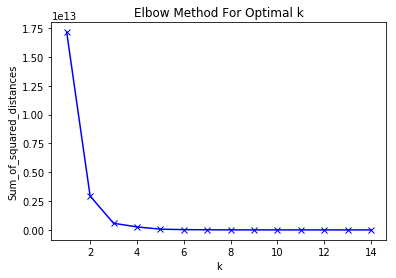

In [155]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Berdasarkan scree plot, diketahui bahwa k paling baik yang bisa diambil yaitu k=3 karena memiliki penurunan yang tidak terlalu tajam

### Kmean with 3 Cluster

In [156]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Cluster Center

In [157]:
print(kmeans.cluster_centers_)

[[1.19411765e+01 1.17831118e+05]
 [2.00000000e+00 3.73173500e+06]
 [2.50000000e+00 1.85025850e+06]]


### Cluster Result

In [158]:
print(kmeans.labels_)

[2 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [159]:
kmeans.fit(X)
labels = kmeans.labels_
data["Cluster"] = labels
data.head()

,pintu_masuk,Sum,Cluster
0,1,2246437.0,1
1,2,3731735.0,2
2,3,234724.0,0
3,4,1454080.0,1
4,5,17279.0,0


### Centroid Visualization

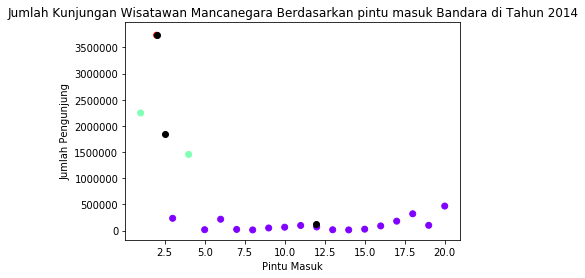

In [160]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("Pintu Masuk")
plt.ylabel("Jumlah Pengunjung")
plt.title("Jumlah Kunjungan Wisatawan Mancanegara Berdasarkan pintu masuk Bandara di Tahun 2014")
plt.show()

Berdasarkan visualisasi centroin, diketahui bahwa centroid dari ketiga cluster adalah sebagai berikut:
- Cluster 1 berada di pintu masuk 12 yaitu Bandara International Lombok dan pada jumlah kedatagan yang tidak terlalu banyak
- Cluster 2 berada di pintu masuk 2 yaitu Bandara Ngurah Rai dan pada jumlah sekitar dua juta pengunjung
- Cluster 3 berada di pintu masuk 1 yaitu Bandara Soekarno Hatta dengan lebih dari 3,5 juta pengunjung

### Clustering Result

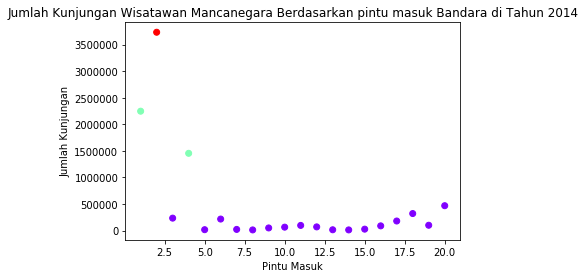

In [161]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Pintu Masuk")
plt.ylabel("Jumlah Kunjungan")
plt.title("Jumlah Kunjungan Wisatawan Mancanegara Berdasarkan pintu masuk Bandara di Tahun 2014")
plt.show()

In [162]:
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
#data_clustered = np.asarray(data_clustered)
data_clustered

,0,1,cluster
9,10.0,64941.0,0
17,18.0,320861.0,0
16,17.0,180392.0,0
15,16.0,89156.0,0
14,15.0,27382.0,0
13,14.0,13156.0,0
12,13.0,15713.0,0
11,12.0,69881.0,0
10,11.0,97672.0,0
19,20.0,468426.0,0


  Berdasarkan hasil clustering, diketahui bahwa :
  - Cluster 2 berisi satu pintu masuk yaitu Bandara Ngurah Rai yang berarti Banyak Wisatawan Asing yang berkunjung ke Bali pada tahun 2014 sebesar 3.731.735 pengunjung.
  - Cluster 1 berisi dua pintu yaitu Bandara Soekarno Hatta dan Bandara Batam yang berarti cukup banyak wisatawan mancanegara yang berkunjung ke Ibukota Negara yaitu Jakarta (Untuk keperluan pemerintahan atau sebagai center dari Indonesia) sebesar 2.246.437 pengunjung dan Batam (Untuk keperluann Jual beli barang di Indonesia) dengan 1.454.080 pengunjung
  - Cluster 3 berisi pintu selain Bandara Ngurah Rai, Bandara Soekarno Hatta dan Bandara Batam yang nilai pengunjungnya dibawah negara tersebut.
 

## Hierarchical Clustering

### Dendogram

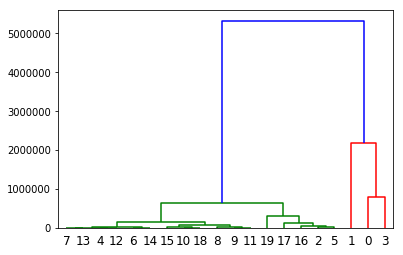

In [164]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

### Fitting

In [170]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
labels

array([0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

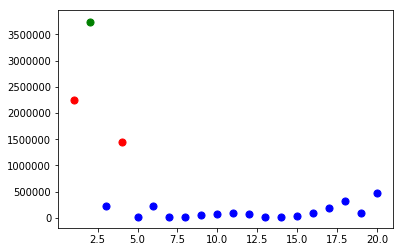

In [172]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.show()

Analisis hasil cluster Sama dengan K-Means Clustering

## DBSCAN

In [198]:
from sklearn.cluster import DBSCAN
epsilon = 10000
minimumSamples = 2
dbscan = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = dbscan.labels_
labels

array([-1, -1, -1, -1,  0, -1,  0,  0, -1,  1,  2,  1,  0,  0,  0,  2, -1,
       -1,  2, -1])

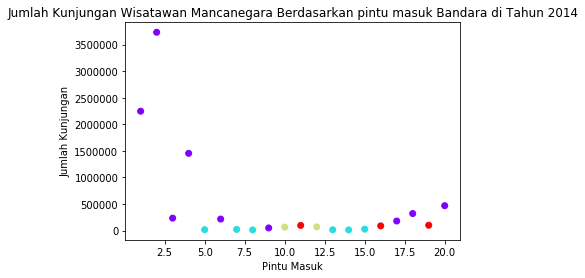

In [199]:
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("Pintu Masuk")
plt.ylabel("Jumlah Kunjungan")
plt.title("Jumlah Kunjungan Wisatawan Mancanegara Berdasarkan pintu masuk Bandara di Tahun 2014")
plt.show()

In [200]:
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(dbscan.labels_)
data_clustered = data_clustered.sort_values('cluster')
#data_clustered = np.asarray(data_clustered)
data_clustered

,0,1,cluster
0,1.0,2246437.0,-1
17,18.0,320861.0,-1
16,17.0,180392.0,-1
8,9.0,50196.0,-1
5,6.0,217193.0,-1
19,20.0,468426.0,-1
3,4.0,1454080.0,-1
2,3.0,234724.0,-1
1,2.0,3731735.0,-1
6,7.0,22464.0,0


- Cluster 2 = 10, 15, 18 (90-100rb) Tanjung Pinang, Adisucipo, Balai Karimun
- Cluster 1 = 9, 11 (60-70rb) Adi Sumarno, Tanjung Priok
- Cluster 0 = 4,6,7,12,13,14(12-22rb) Sam Ratulangi, Entikong, Adi Sumarno, Makasar, Sepinggan, Sultan Syarif Kasim II
- Cluster -1 = 0, 1, 2, 3, 5, 8, 16, 17, 19 (200-400rb)
Soekarno-Hatta, Ngurah Rai, Kualanamu Int, Batam, Juanda, Minangkabau, Husein Sastranegara, Tanjung Uban, Pintu Lainnya